In [1]:
!pip install -U pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 255.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: juliacall
    Found existing installation: juliacall 0.9.19
    Uninstalling juliacall-0.9.19:
      Successfully uninstalled juliacall-0.9.19
  Attempting uninstall: pysr
    Found existing installation: pysr 0.18.2
    Uninstalling pysr-0.18.2:
      Successfully uninstalled pysr-0.18.2


In [60]:
import pandas as pd

In [37]:
import numpy as np
U_pred_0 = np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthOrderPDE_PinnSymReg/Combined/Train/U_pred.npy")
U_pred_1= np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthOrderPDE_PinnSymReg/Cos/Train/U_pred.npy")
U_pred_2=np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthOrderPDE_PinnSymReg/Exp/Train/U_pred.npy")

f= np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Sin/Train/f.npy")
t=np.linspace(0,2,500).reshape(-1,1)
x=np.linspace(-1,1,500).reshape(-1,1)
xx, tt = np.meshgrid(x, t)
X = np.vstack((np.ravel(xx), np.ravel(tt))).T

In [38]:
import pandas as pd

# Assuming you have already computed U_pred
data0 = {'x': xx.flatten(), 't': tt.flatten(), 'type': [0] * len(xx.flatten()),'U_pred': U_pred_0.flatten()}
df0 = pd.DataFrame(data0)
data1 = {'x': xx.flatten(), 't': tt.flatten(), 'type': [1] * len(xx.flatten()),'U_pred': U_pred_1.flatten()}
df1 = pd.DataFrame(data1)
data2 = {'x': xx.flatten(), 't': tt.flatten(), 'type': [2] * len(xx.flatten()),'U_pred': U_pred_2.flatten()}
df2= pd.DataFrame(data2)


In [4]:
X = df0[['t','x']].values
y = df0['U_pred'].values

In [53]:
df0

,x,t,type,U_pred
0,-1.000000,0.0,0,-0.947932
1,-0.995992,0.0,0,-0.937642
2,-0.991984,0.0,0,-0.927364
3,-0.987976,0.0,0,-0.917098
4,-0.983968,0.0,0,-0.906847
...,...,...,...,...
249995,0.983968,2.0,0,-0.999043
249996,0.987976,2.0,0,-1.002808
249997,0.991984,2.0,0,-1.006585
249998,0.995992,2.0,0,-1.010374


In [39]:

# Extract features and target variable
X_raw = df0[['x', 't']].values
y = df0['U_pred'].values

# Fit the PySR model
model = PySRRegressor(
    niterations=30,
    batching=True,
    batch_size=264,
    fast_cycle=True,
    unary_operators=["cos", "exp", "sin"],
    populations=40,
    model_selection='best',)
model.fit(X_raw, y)

/home/trl102/miniconda3/envs/tf/lib/python3.9/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.270e+00
Head worker occupation: 0.0%
Progress: 1 / 1200 total iterations (0.083%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           4.728e-01  7.971e+00  y = sin(0.18077)
3           4.717e-01  2.327e-03  y = sin(sin(0.18077))
4           4.707e-01  2.291e-03  y = sin(sin(sin(0.18077)))
5           2.078e-01  8.174e-01  y = sin(sin(-0.82018 * 0.18077))
6           1.634e-01  2.405e-01  y = sin((x₀ - x₁) * 0.18077)
8           1.065e-01  2.140e-01  y = sin(((-0.82018 - x₁) - x₁) * 0.18077)
12          1.049e-01  3.890e-03  y = sin(sin(sin((((-0.048967 * -0.82018) - x₁) - x₁) * 0.18077...
                                  )))
13          9.700e-02  7.811e-02  y = sin(sin(sin(0.18077) * ((exp(-0.3945) - x₁) - (x₁ + x₁))))
16          9.043e-02  2.336e-02  y = sin(((cos(x₁) - (cos(cos(x₀)) + x₁)) - cos(sin(cos(x₁)))) ...
                

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          0.2179378   
	1         1.242810                                    sin(-2.7416806)   
	2         0.433927                                   x1 * -0.39080352   
	3         0.004074                              sin(-0.42018664 * x1)   
	4         0.334161                            (-0.00298357 - x0) * x0   
	5         0.135447                         x1 * (cos(x0) - 1.2023388)   
	6         0.431145                      sin(cos(x0 * 2.1576846) - x1)   
	7         0.475511                 sin(sin(cos(-2.241254 * x0) - x1))   
	8         0.896328        sin((cos(x0 * 2.633984) - x1) * 0.55189013)   
	9         0.145009   sin((-0.49817434 * (x1 - 0.771729)) - (x0 * x0))   
	10        0.235164     sin(((x1 - cos(x0)) * -0.5016668) - (x0 * x0))   
	11        0.301827  sin(((-0.933093 + x1) * -0.52200884) - ((x0 * ...   
	12        0.001824  sin(sin((-0.933093 + x1) * -0.52200884) - ((x0...   
	13        0.117979  sin(sin(0.5918575 * (cos(-0.38690588) - ((x0 *...   
	14        0.294550  sin((0.8164773 - (x1 + (x0 * (x0 + x0)))) * si...   
	15  >>>>  0.498448  sin((0.8164773 - (x1 + (x0 * (x0 + x0)))) * (c...   
	16        0.040425  sin(sin(exp(sin(-0.5200074 * x1))) * (0.816477...   
	17        0.172161  sin(sin(exp(sin(sin(-0.5388865 * x1)))) * (0.8...   
	18        0.000030  sin((sin(exp(sin(sin(-0.5388865 * x1)))) * 0.9...   
	
	        loss  complexity  
	0   0.517698           1  
	1   0.149393           2  
	2   0.096801           3  
	3   0.096407           4  
	4   0.069022           5  
	5   0.060278           6  
	6   0.039167           7  
	7   0.024345           8  
	8   0.009934           9  
	9   0.008593          10  
	10  0.006792          11  
	11  0.005023          12  
	12  0.005014          13  
	13  0.004456          14  
	14  0.003319          15  
	15  0.002016          16  
	16  0.001936          17  
	17  0.001630          18  
	18  0.001630          20  
]

In [58]:
# niterations=30: population: 50, loss=best
model.sympy()

sin(0.847157245261511*(-2*x0**2 - x1 + 0.8164773)*cos(sin(x1)))

In [33]:
# niterations=40: population: 50, loss=best

model.sympy()

sin(1.4093524*x0**2/(-x1 - 0.8240348) - 1.4093524*sin(x1) + 0.591558586061083)

In [34]:
model.latex()

'\\sin{\\left(\\frac{1.41 x_{0}^{2}}{- x_{1} - 0.824} - 1.41 \\sin{\\left(x_{1} \\right)} + 0.592 \\right)}'

In [51]:
model.latex()

'\\sin{\\left(0.847 \\left(- 2 x_{0}^{2} - x_{1} + 0.817\\right) \\cos{\\left(\\sin{\\left(x_{1} \\right)} \\right)} \\right)}'

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.use('pgf')
import tensorflow as tf
import numpy as np
import scipy.io
from scipy.interpolate import griddata
import time
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

2024-05-11 09:48:54.460146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 09:49:04.657982: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 09:50:25.803507: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/trl102/miniconda3/envs/tf/lib/
2024-05-11 09:50:25.803651: W tensorflow/compiler

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


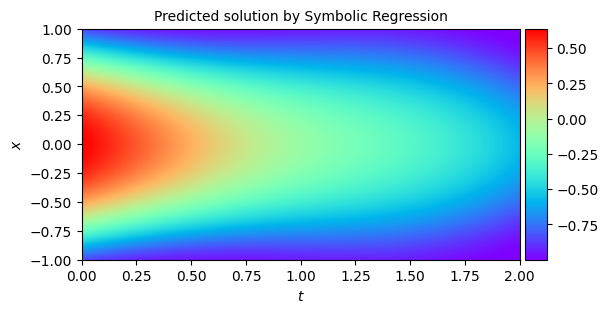

In [56]:
t=np.linspace(0,2,500).reshape(-1,1)
x=np.linspace(-1,1,500).reshape(-1,1)
xx, tt = np.meshgrid(x, t)
X = np.vstack((np.ravel(xx), np.ravel(tt))).T
import matplotlib.gridspec as gridspe
from matplotlib.gridspec import GridSpec
%matplotlib inline
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(6, 3))


def my_function(x, t): 
    term1 = 0.847157245261511 * (-2 * x**2 - t + 0.8164773)
    term2 = np.cos(np.sin(t))
    return np.sin(term1 * term2)

# Evaluate the function over the grid
U_SymReg = my_function(xx, tt)

h = ax.imshow(U_SymReg.T, interpolation='nearest', cmap='rainbow',
                  extent=[t.min(), t.max(), x.min(), x.max()],
                  origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
line = np.linspace(x.min(), x.max(), 2)[:,None]

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('Predicted solution by Symbolic Regression', fontsize = 10)

plt.savefig('W_2d_comb_symreg.eps',dpi=300)

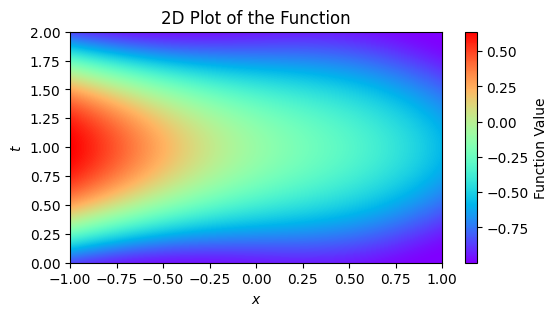

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define the grid
t_values = np.linspace(0, 2, 500)
x_values = np.linspace(-1, 1, 500)
xx, tt = np.meshgrid(x_values, t_values)

# Define the function based on the provided LaTex expression

def my_function(x0, x1):
    term1 = 1.41 * (x0 ** 2) / (- x1 - 0.824)
    term2 = 1.41 * np.sin(x1)
    return np.sin(term1 - term2 + 0.592)

def my_function1(x0, x1):
    term1 = 0.847157245261511 * (-2 * x0**2 - x1 + 0.8164773)
    term2 = np.cos(np.sin(x1))
    return np.sin(term1 * term2)

# Evaluate the function over the grid
Z = my_function1(xx, tt)
# Plot the function
plt.figure(figsize=(6, 3))
plt.imshow(Z.T, extent=[-1, 1, 0, 2], cmap='rainbow', origin='lower', aspect='auto')
plt.colorbar(label='Function Value')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title('2D Plot of the Function')
plt.show()